In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
shark_data = pd.read_csv("Shark Tank India.csv")

In [3]:
shark_data.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Education,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN


In [4]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              478 non-null    int64  
 1   Startup Name               478 non-null    object 
 2   Episode Number             478 non-null    int64  
 3   Pitch Number               478 non-null    int64  
 4   Season Start               478 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          447 non-null    object 
 7   Episode Title              478 non-null    object 
 8   Anchor                     478 non-null    object 
 9   Industry                   478 non-null    object 
 10  Business Description       478 non-null    object 
 11  Company Website            466 non-null    object 
 12  Started in                 355 non-null    float64
 13  Number of Presenters       478 non-null    int64  

# Let's find out how much data do we have for each season

In [5]:
shark_data.groupby(by='Season Number').count()['Startup Name']

Season Number
1    152
2    169
3    157
Name: Startup Name, dtype: int64

# Let seperate the dataset based on season to get in debt view of each season

## However before doing that, let's go through data dictionary and understand what columns will help us in this analysis

Here is the data dictionary for Shark Tank (India) season's dataset.

- Season Number - Season number
- Startup Name - Company name or product name
- Episode Number - Episode number within the season
- Pitch Number - Overall pitch number
- Season Start - Season first aired date
- Season End - Season last aired date
- Original Air Date - Episode original/first aired date, on OTT/TV
- Episode Title - Episode title in SonyLiv
- Anchor - Name of the episode presenter/host
- Industry - Industry name or type
- Business Description - Business Description
- Company Website - Company Website URL
- Started in - Year in which startup was started/incorporated
- Number of Presenters - Number of presenters
- Male Presenters - Number of male presenters
- Female Presenters - Number of female presenters
- Transgender Presenters - Number of transgender/LGBTQ presenters
- Couple Presenters - Are presenters wife/husband ? 1-yes, 0-no
- Pitchers Average Age - All pitchers average age, <30 young, 30-50 middle, >50 old
- Pitchers City - Presenter's town/city or city where company head office exists
- Pitchers State - Indian state pitcher hails from or state where company head office exists
- Yearly Revenue - Yearly revenue, in lakhs INR, -1 means negative revenue, 0 means pre-revenue
- Monthly Sales - Total monthly sales, in lakhs
- Gross Margin - Gross margin/profit of company, in percentages
- Net Margin - Net margin/profit of company, in percentages
- EBITDA - Earnings Before Interest, Taxes, Depreciation, and Amortization
- Cash Burn - In loss; burning/paying money from their pocket (yes/no)
- SKUs - Stock Keeping Units or number of varieties, at the time of pitch
- Has Patents - Pitcher has Patents/Intellectual property (filed/granted), at the time of pitch
- Bootstrapped - Startup is bootstrapped or not (yes/no)
- Original Ask Amount - Original Ask Amount, in lakhs INR
- Original Offered Equity - Original Offered Equity, in percentages
- Valuation Requested - Valuation Requested, in lakhs INR
- Received Offer - Received offer or not, 1-received, 0-not received
- Accepted Offer - Accepted offer or not, 1-accepted, 0-rejected
- Total Deal Amount - Total Deal Amount, in lakhs INR
- Total Deal Equity - Total Deal Equity, in percentages
- Total Deal Debt - Total Deal debt/loan amount, in lakhs INR
- Debt Interest - Debt interest rate, in percentages
- Deal Valuation - Deal Valuation, in lakhs INR
- Number of sharks in deal - Number of sharks involved in deal
- Deal has conditions - Deal has conditions or not? (yes or no)
- Royalty Deal - Is it royalty deal or not (1-yes)
- Advisory Shares Equity - Deal with Advisory shares or equity, in percentages
- Namita Investment Amount - Namita Investment Amount, in lakhs INR
- Namita Investment Equity - Namita Investment Equity, in percentages
- Namita Debt Amount - Namita Debt Amount, in lakhs INR
- Vineeta Investment Amount - Vineeta Investment Amount, in lakhs INR
- Vineeta Investment Equity - Vineeta Investment Equity, in percentages
- Vineeta Debt Amount - Vineeta Debt Amount, in lakhs INR
- Anupam Investment Amount - Anupam Investment Amount, in lakhs INR
- Anupam Investment Equity - Anupam Investment Equity, in percentages
- Anupam Debt Amount - Anupam Debt Amount, in lakhs INR
- Aman Investment Amount - Aman Investment Amount, in lakhs INR
- Aman Investment Equity - Aman Investment Equity, in percentages
- Aman Debt Amount - Aman Debt Amount, in lakhs INR
- Peyush Investment Amount - Peyush Investment Amount, in lakhs INR
- Peyush Investment Equity - Peyush Investment Equity, in percentages
- Peyush Debt Amount - Peyush Debt Amount, in lakhs INR
- Amit Investment Amount - Amit Investment Amount, in lakhs INR
- Amit Investment Equity - Amit Investment Equity, in percentages
- Amit Debt Amount - Amit Debt Amount, in lakhs INR
- Ashneer Investment Amount - Ashneer Investment Amount, in lakhs INR
- Ashneer Investment Equity - Ashneer Investment Equity, in percentages
- Ashneer Debt Amount - Ashneer Debt Amount, in lakhs INR
- Guest Investment Amount - Guest Investment Amount, in lakhs INR
- Guest Investment Equity - Guest Investment Equity, in percentages
- Guest Debt Amount - Guest Debt Amount, in lakhs INR
- Invested Guest Name - Name of the guest who invested in deal
- All Guest Names - Name of all guests, who are present in episode
- Namita Present - Whether Namita present in episode or not
- Anupam Present - Whether Anupam present in episode or not
- Vineeta Present - Whether Vineeta present in episode or not
- Aman Present - Whether Aman present in episode or not
- Peyush Present - Whether Peyush present in episode or not
- Amit Present - Whether Amit present in episode or not
- Ashneer Present - Whether Ashneer present in episode or not
- Guest Present - Whether Guest(s) present in episode or not


In [6]:
req_col = 'Season Number /Startup Name /Episode Number /Pitch Number /Industry /Business Description /Number of Presenters /Male Presenters /Female Presenters /Transgender Presenters /Couple Presenters /Pitchers Average Age /Pitchers City /Pitchers State /Original Ask Amount /Original Offered Equity /Valuation Requested /Received Offer /Accepted Offer /Total Deal Amount /Total Deal Equity /Total Deal Debt /Debt Interest /Deal Valuation /Number of Sharks in Deal /Deal Has Conditions /Royalty Deal /Advisory Shares Equity'.split(' /')
req_col

['Season Number',
 'Startup Name',
 'Episode Number',
 'Pitch Number',
 'Industry',
 'Business Description',
 'Number of Presenters',
 'Male Presenters',
 'Female Presenters',
 'Transgender Presenters',
 'Couple Presenters',
 'Pitchers Average Age',
 'Pitchers City',
 'Pitchers State',
 'Original Ask Amount',
 'Original Offered Equity',
 'Valuation Requested',
 'Received Offer',
 'Accepted Offer',
 'Total Deal Amount',
 'Total Deal Equity',
 'Total Deal Debt',
 'Debt Interest',
 'Deal Valuation',
 'Number of Sharks in Deal',
 'Deal Has Conditions',
 'Royalty Deal',
 'Advisory Shares Equity']

# Some cleaning is require
- Male female and trans need to set to be 0 if not there
- Set couple presenter to 0
- Accepted Offer set to 0 for blanks
- Total Deal Amount	Total Deal Equity	Total Deal Debt Debt Interest	Deal Valuation, set to 0 if deal didn't happened
- Deal Has Conditions	Royalty Deal	Advisory Shares Equity set no if deal not happened



In [7]:
shark_data = shark_data[req_col]

In [8]:
# sns.heatmap(
pd.DataFrame({'Missing Count': shark_data.isnull().sum(), 'Missing Percentage': 100 * shark_data.isnull().sum()/len(shark_data)})
#     , cbar=False)
    

,Missing Count,Missing Percentage
Season Number,0,0.000000
Startup Name,0,0.000000
Episode Number,0,0.000000
Pitch Number,0,0.000000
Industry,0,0.000000
Business Description,0,0.000000
Number of Presenters,0,0.000000
Male Presenters,66,13.807531
Female Presenters,252,52.719665
Transgender Presenters,475,99.372385


In [9]:
columns_to_fill = 'Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters'.split(', ')
columns_to_fill_2 = 'Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Advisory Shares Equity'.split(', ')
shark_data[columns_to_fill] = shark_data[columns_to_fill].fillna(0).astype(int)
shark_data.loc[shark_data['Received Offer'] == 0, 'Accepted Offer'] = shark_data.loc[shark_data['Received Offer'] == 0, 'Accepted Offer'].fillna(0).astype(int)
shark_data['Advisory Shares Equity'].fillna(0, inplace=True)
shark_data['Total Deal Debt'].fillna(0, inplace=True)
shark_data['Debt Interest'].fillna(0, inplace=True)
shark_data['Deal Valuation'].fillna(10, inplace=True)
shark_data.loc[shark_data['Accepted Offer'] == 0, columns_to_fill_2] = shark_data.loc[shark_data['Accepted Offer'] == 0, columns_to_fill_2].fillna(0)
shark_data['Deal Has Conditions'] = shark_data['Deal Has Conditions'].fillna('no')
shark_data['Royalty Deal'].fillna(0, inplace=True)
shark_data['Valuation Requested'] = shark_data['Valuation Requested'] * 0.01
shark_data['Deal Valuation'] = shark_data['Deal Valuation'] * 0.01
shark_data['Royalty Deal'] = shark_data['Royalty Deal'].astype(int)

C:\Users\adars\AppData\Local\Temp\ipykernel_23540\1561781713.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\adars\AppData\Local\Temp\ipykernel_23540\1561781713.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
shark_data['Accepted Offer'] = shark_data['Accepted Offer'].astype(int)

In [11]:
tank_s1 = shark_data[shark_data['Season Number'] == 1][req_col]
tank_s2 = shark_data[shark_data['Season Number'] == 2][req_col]
tank_s3 = shark_data[shark_data['Season Number'] == 3][req_col]


In [12]:
data_list = [tank_s1, tank_s2, tank_s3]

In [13]:
pd.DataFrame({'Missing Count': shark_data.isnull().sum(), 'Missing Percentage': 100 * shark_data.isnull().sum()/len(shark_data)})


,Missing Count,Missing Percentage
Season Number,0,0.000000
Startup Name,0,0.000000
Episode Number,0,0.000000
Pitch Number,0,0.000000
Industry,0,0.000000
Business Description,0,0.000000
Number of Presenters,0,0.000000
Male Presenters,0,0.000000
Female Presenters,0,0.000000
Transgender Presenters,0,0.000000


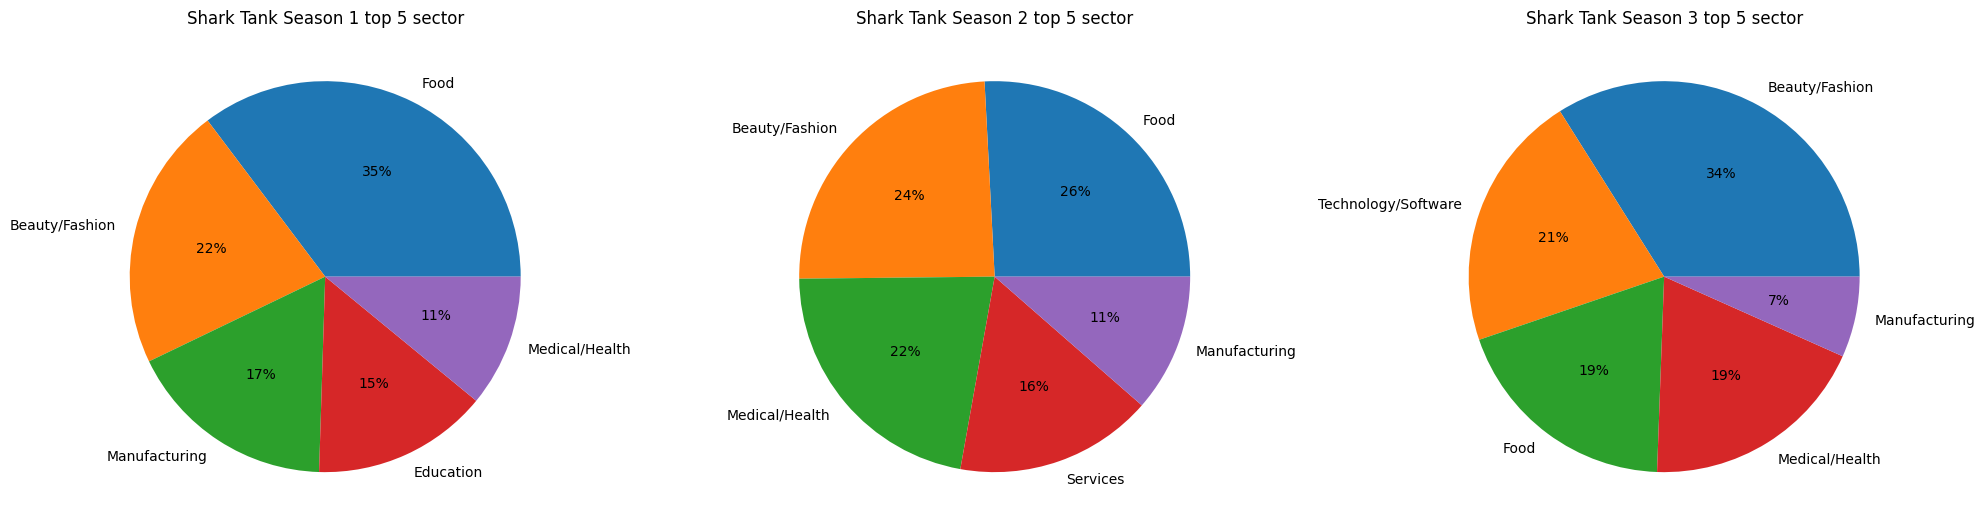

The sector that reserved their spot in top throughout the 3 season are ('Manufacturing', 'Medical/Health', 'Beauty/Fashion', 'Food')


In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20,10))

industry_list = {}
for i, data in enumerate(data_list):
   
    industry_totals = data.groupby(by='Industry').sum()[['Total Deal Amount']].sort_values(['Total Deal Amount', 'Industry'], ascending=False).head(5)
    
    industry_list[i] = industry_totals.index
    
    axes[i].pie(x=industry_totals['Total Deal Amount'], labels=industry_totals.index, autopct='%1.0f%%')
    
    axes[i].set_title(f'Shark Tank Season {i+1} top 5 sector')
    
    
    
plt.tight_layout()

plt.show()

sector_sets = [set(sector) for sector in industry_list.values()]

print(f"The sector that reserved their spot in top throughout the 3 season are {*(set.intersection(*sector_sets)),}")






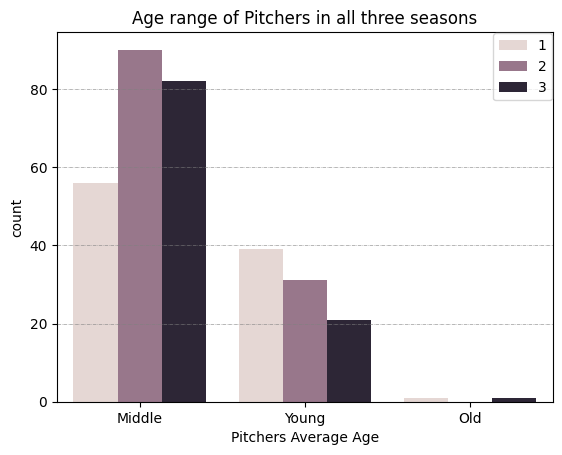

In [15]:
sns.countplot(x="Pitchers Average Age", data=shark_data[shark_data['Received Offer'] == 1],hue="Season Number", saturation=0.5)
plt.title("Age range of Pitchers in all three seasons")
plt.legend(loc=(0.88,.815))
plt.grid(visible=True, axis='y',color = "grey", linewidth = "0.4", linestyle = "-.");

In [16]:
count_data = pd.DataFrame({"count":shark_data.loc[shark_data['Received Offer']==1, ['Received Offer', 'Accepted Offer']].value_counts()}).unstack().fillna(0).astype(int)

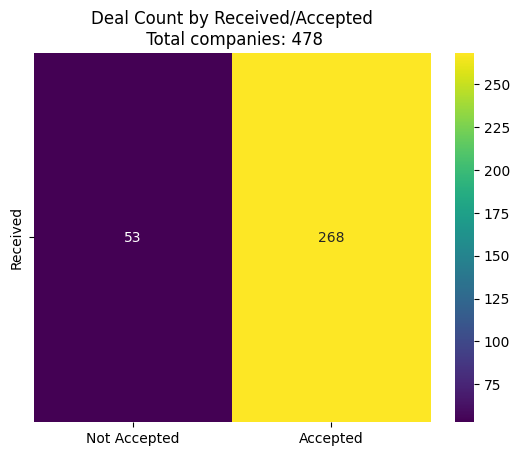

In [17]:
sns.heatmap(count_data, annot=True
            ,xticklabels=['Not Accepted', "Accepted"] 
            , yticklabels=["Received"], cmap="viridis", fmt='d')
plt.xlabel(''), plt.ylabel('')
plt.title(f"Deal Count by Received/Accepted\n Total companies: {len(shark_data)}");



# Lets focus on these 268 companies. Do they got the valuation what they ask for?

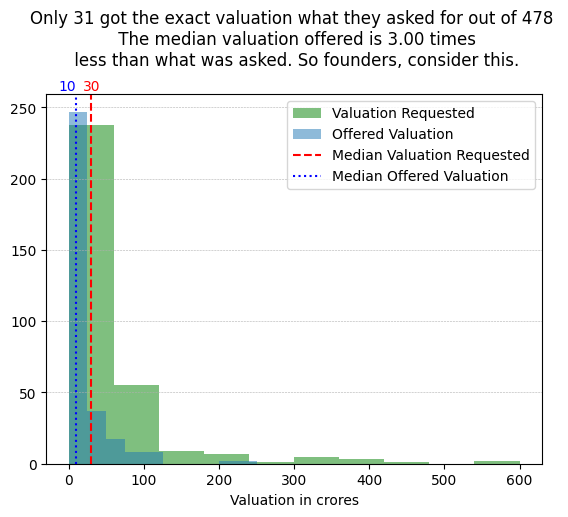

In [18]:


plt.hist(shark_data.loc[shark_data['Received Offer']==1, 'Valuation Requested'], alpha=0.5, label='Valuation Requested', color='green')
plt.hist(shark_data.loc[shark_data['Received Offer']==1, 'Deal Valuation'], alpha=0.5, label='Offered Valuation');
median_valuation_requested=shark_data.loc[shark_data['Received Offer']==1, 'Valuation Requested'].median()
median_valuation_offered=shark_data.loc[shark_data['Received Offer']==1, 'Deal Valuation'].median()

plt.axvline(shark_data.loc[shark_data['Received Offer']==1, 'Valuation Requested'].median(), color='r', ls='--', label='Median Valuation Requested')
plt.axvline(shark_data.loc[shark_data['Received Offer']==1, 'Deal Valuation'].median(), color='b', ls=':', label='Median Offered Valuation')
plt.text(median_valuation_requested, 1.01 * plt.gca().get_ylim()[1], f"{median_valuation_requested:.0f}", color='r', ha='center')
plt.text(median_valuation_offered, 1.01 * plt.gca().get_ylim()[1], f"{median_valuation_offered:.0f}", color='b', ha='right')
plt.xlabel("Valuation in crores")
plt.title(f"Only {len(shark_data[shark_data['Deal Valuation'] == shark_data['Valuation Requested']])} got the exact valuation what they asked for out of {len(shark_data)} \n The median valuation offered is {shark_data.loc[shark_data['Received Offer']==1, 'Valuation Requested'].median()/shark_data.loc[shark_data['Received Offer']==1, 'Deal Valuation'].median():.2f} times\n less than what was asked. So founders, consider this.\n")
plt.legend()
plt.grid(visible=True, axis='y', lw=0.4, ls='--');


In [19]:
print(f"Only {len(shark_data[shark_data['Deal Valuation'] == shark_data['Valuation Requested']])} got the exact valuation what they asked for out of {len(shark_data)}") 

Only 31 got the exact valuation what they asked for out of 478


## This was for the entire shark tank season, let check each season. Are there any changes in the valuation game by season

This shows that Sharks were ferocious in season 1. However, they tend to ease down and start offering more money in further seasons.


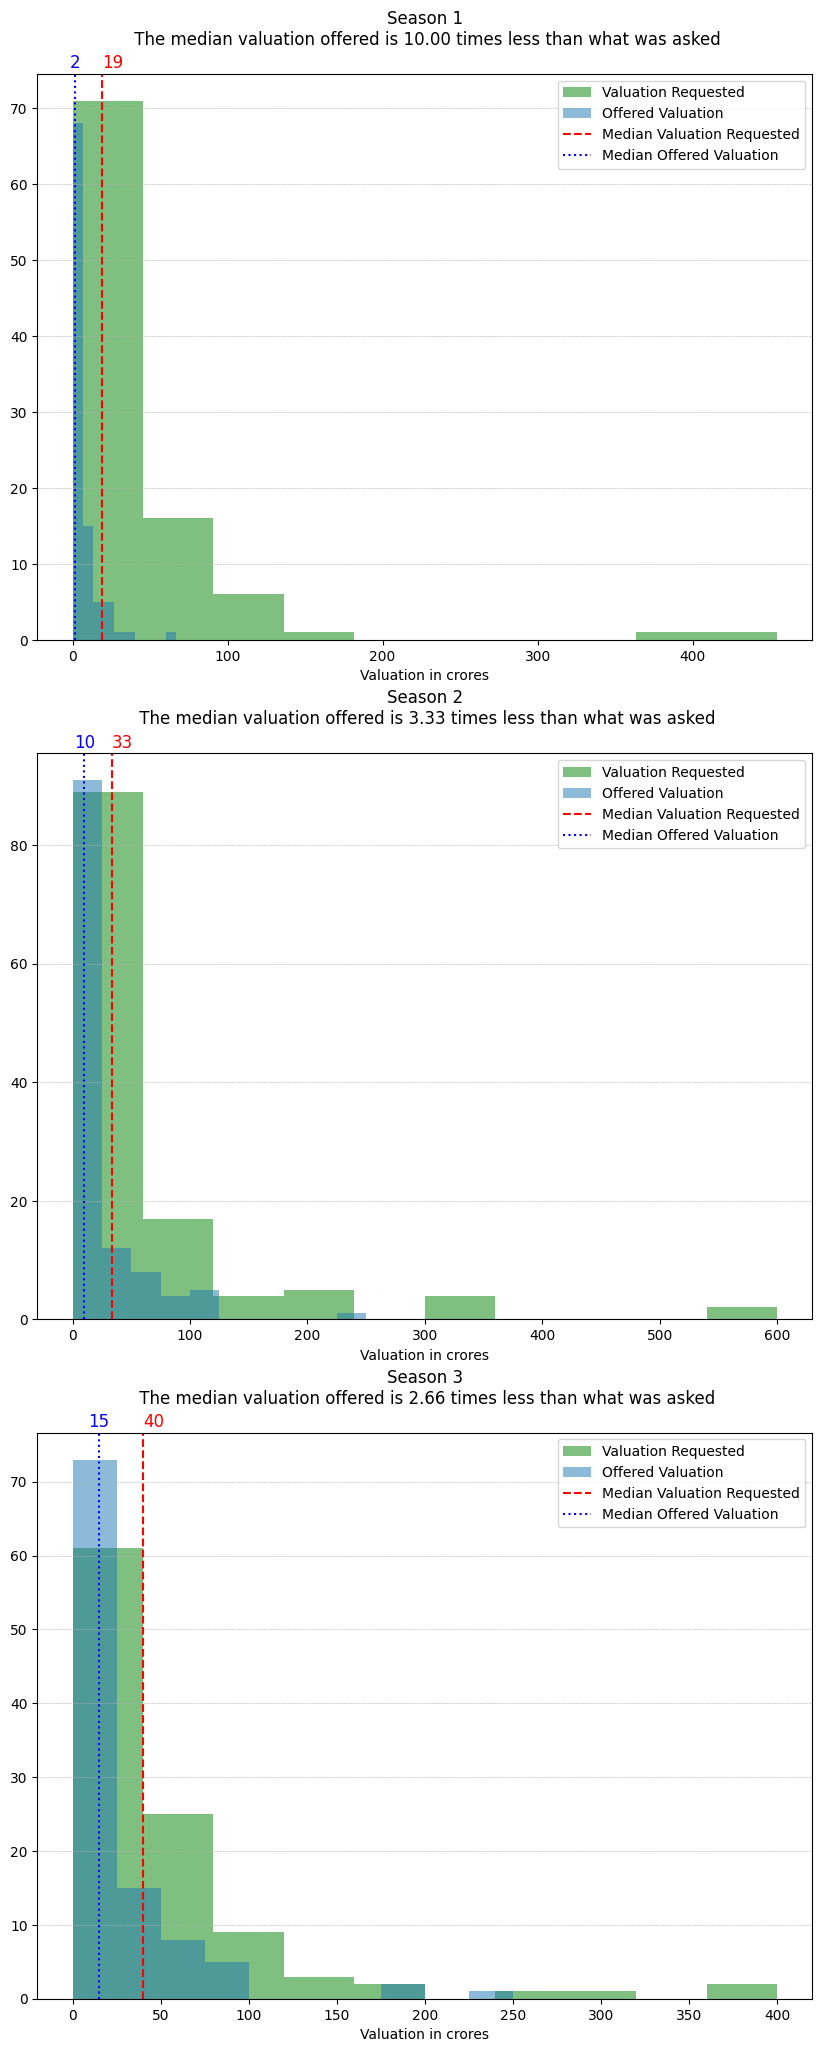

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 25))


for i in range(len(data_list)):
    axes[i].hist(data_list[i].loc[data_list[i]['Received Offer']==1, 'Valuation Requested'], alpha=0.5, label='Valuation Requested', color='green')
    axes[i].hist(data_list[i].loc[data_list[i]['Received Offer']==1, 'Deal Valuation'], alpha=0.5, label='Offered Valuation')
    median_valuation_requested=data_list[i].loc[data_list[i]['Received Offer']==1, 'Valuation Requested'].median()
    median_valuation_offered=data_list[i].loc[data_list[i]['Received Offer']==1, 'Deal Valuation'].median()

    axes[i].axvline(median_valuation_requested, color='r', ls='--', label='Median Valuation Requested')
    axes[i].axvline(median_valuation_offered, color='b', ls=':', label='Median Offered Valuation')
    axes[i].set_xlabel("Valuation in crores")
    axes[i].set_title(f"Season {i+1}\n The median valuation offered is {data_list[i].loc[data_list[i]['Received Offer']==1, 'Valuation Requested'].median()/data_list[i].loc[data_list[i]['Received Offer']==1, 'Deal Valuation'].median():.2f} times less than what was asked\n")
    axes[i].text(median_valuation_offered, 1.01 * axes[i].get_ylim()[1], f'{median_valuation_offered:.0f}', color='b', fontsize=12, ha='center')
    axes[i].text(median_valuation_requested, 1.01 * axes[i].get_ylim()[1], f'{median_valuation_requested:.0f}', color='r', fontsize=12, ha='left')
    axes[i].legend()
    axes[i].grid(visible=True, axis='y', lw=0.4, ls='--');    
# plt.tight_layout()

print("This shows that Sharks were ferocious in season 1. However, they tend to ease down and start offering more money in further seasons.")


# Are entrepreneurs getting closer to their asking prices over time, or are valuations becoming more disparate?

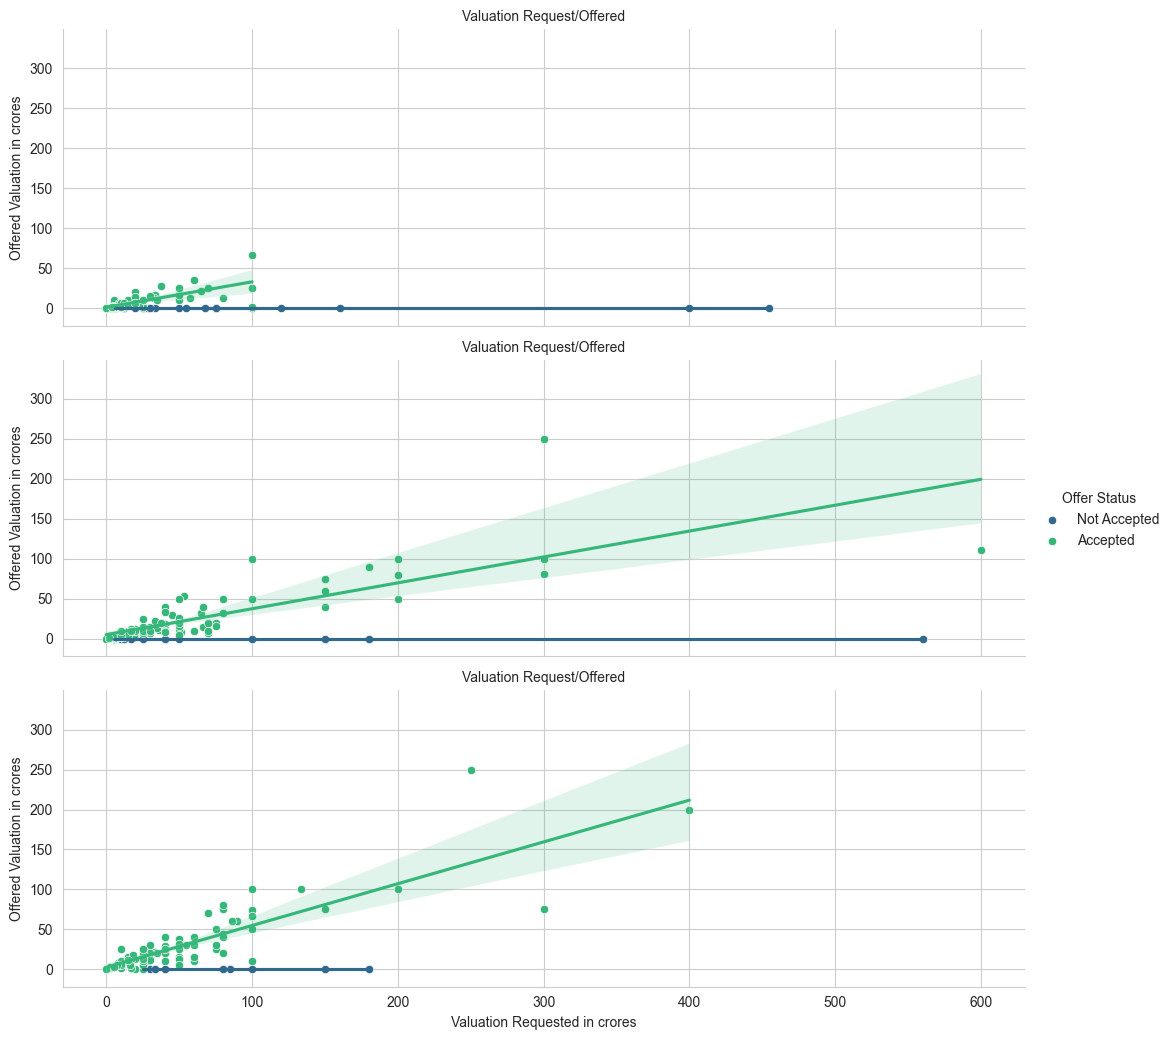

In [21]:
sns.set_style('whitegrid')
grid = sns.FacetGrid(shark_data[shark_data['Received Offer']==1], row="Season Number", hue='Accepted Offer', 
                     aspect=3, height=3.5, palette='viridis')
grid.map(sns.scatterplot, 'Valuation Requested', 'Deal Valuation')
grid.map(sns.regplot, 'Valuation Requested', 'Deal Valuation', scatter=False)
grid.set_xlabels("Valuation Requested in crores")
grid.set_ylabels("Offered Valuation in crores")
legend_labels = {0: 'Not Accepted', 1: 'Accepted'}
grid.add_legend(title='Offer Status', labels=legend_labels.values())
# plt.legend(loc=(1,3), title='Offer status');
grid.set_titles(f"Valuation Request/Offered");
# plt.tight_layout();

# Lets compare each sector deal size and where the

In [22]:
import plotly.graph_objects as go


In [23]:
filtered_data = shark_data[shark_data['Received Offer'] == 1][['Industry', 'Valuation Requested', 'Deal Valuation', 'Accepted Offer']]

In [24]:
filtered_data.groupby(by='Industry').describe()

Valuation Requested                          \
                                           count        mean         std   
Industry                                                                   
Agriculture                                  3.0   42.666667   50.856006   
Animal/Pets                                  3.0   15.833333    8.036376   
Beauty/Fashion                              66.0   72.205174  114.231892   
Education                                    8.0   34.020833   28.014514   
Electronics                                  3.0  150.000000  217.025344   
Entertainment                                1.0  300.000000         NaN   
Food                                        77.0   42.694341   61.324988   
Furnishing/Household                        14.0   55.500000   45.089986   
Hardware                                     1.0    4.700000         NaN   
Liquor/Beverages                             9.0   27.268519   12.309505   
Manufacturing                               29.0   30.331625   33.176667   
Medical/Health                              33.0   59.296869   54.262963   
Others                                       2.0   22.500000   24.748737   
Services                                    20.0   52.278833   51.048849   
Sports                                       7.0   32.857143   32.513733   
Technology/Software                         35.0   63.093452  100.169210   
Vehicles/Electrical Vehicles                10.0   42.017000   42.894050   

                                                                         \
                                   min         25%         50%      75%   
Industry                                                                  
Agriculture                     3.0000   14.000000   25.000000   62.500   
Animal/Pets                    10.0000   11.250000   12.500000   18.750   
Beauty/Fashion                  1.0000   10.000000   30.000000   75.000   
Education                       0.5000   12.500000   33.333333   52.500   
Electronics                    10.0000   25.000000   40.000000  220.000   
Entertainment                 300.0000  300.000000  300.000000  300.000   
Food                            0.0000   10.000000   25.000000   40.000   
Furnishing/Household            4.0000   27.083333   50.000000   69.500   
Hardware                        4.7000    4.700000    4.700000    4.700   
Liquor/Beverages                8.7500   20.000000   25.000000   30.000   
Manufacturing                   0.0125   10.000000   20.000000   30.000   
Medical/Health                  0.0000   30.000000   50.000000   70.000   
Others                          5.0000   13.750000   22.500000   31.250   
Services                        0.7000   19.166667   35.500000   62.855   
Sports                         10.0000   10.000000   20.000000   50.000   
Technology/Software             2.5000   17.000000   40.000000   60.000   
Vehicles/Electrical Vehicles    0.0000   10.000000   23.750000   87.500   

                                    Deal Valuation              ...  \
                                max          count        mean  ...   
Industry                                                        ...   
Agriculture                   100.0            3.0   18.416667  ...   
Animal/Pets                    25.0            3.0    3.143333  ...   
Beauty/Fashion                560.0           66.0   21.195070  ...   
Education                      75.0            8.0   11.950000  ...   
Electronics                   400.0            3.0   70.833333  ...   
Entertainment                 300.0            1.0  250.000000  ...   
Food                          400.0           77.0   10.740140  ...   
Furnishing/Household          180.0           14.0   13.230442  ...   
Hardware                        4.7            1.0    0.330000  ...   
Liquor/Beverages               50.0            9.0    9.800533  ...   
Manufacturing                 150.0           29.0   13.383190  ...   
Medical/Healt

In [25]:
px.colors.sequential.Viridis[1]

'#482878'

In [26]:
first = go.Box(x=filtered_data['Industry'], y=filtered_data['Valuation Requested'], name='Valuation Requested',
               fillcolor=px.colors.sequential.Viridis[5], marker={'color': px.colors.sequential.Viridis[5]})
second = go.Box(x=filtered_data['Industry'], y=filtered_data['Deal Valuation'], name='Valuation Offered',
                fillcolor=px.colors.sequential.Viridis[3], marker={'color': px.colors.sequential.Viridis[3]})
layout = go.Layout(
#     colorscale={'diverging':[px.colors.sequential.Viridis[0], px.colors.sequential.Viridis[1]]},
    boxmode='group',
    autosize=False,
    height=600,
    width=1000,
    title = {'text':'Deal comparison for each sector', 'x':0.5},
    xaxis = {'title':'Sectors'},
    yaxis = {'title':'Valuation in crores'},
    legend=dict(orientation="h",yanchor="bottom", y=-0.75, xanchor="center", x=0.5)


)
go.Figure([first, second], layout=layout)


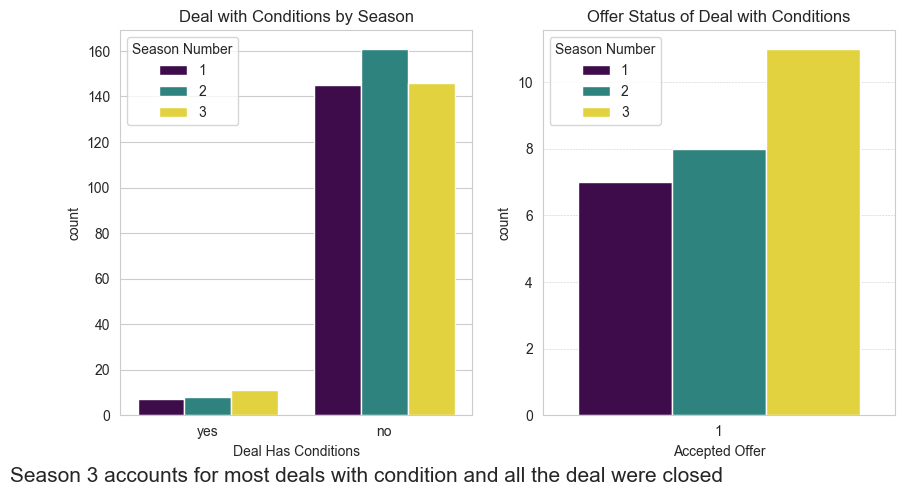

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))


sns.countplot(data=shark_data, x='Deal Has Conditions', palette='viridis', hue='Season Number', ax=axes[0], order=['yes', 'no'])
sns.countplot(data=shark_data[shark_data['Deal Has Conditions']=='yes'], x='Accepted Offer', hue='Season Number', ax=axes[1], palette='viridis')
axes[0].set_title('Deal with Conditions by Season')
axes[1].set_title("Offer Status of Deal with Conditions")
plt.grid(visible=True, axis='y', lw=0.4, ls='--')
plt.text(x=-1, y =-2, s="Season 3 accounts for most deals with condition and all the deal were closed", fontsize=15, ha='center');


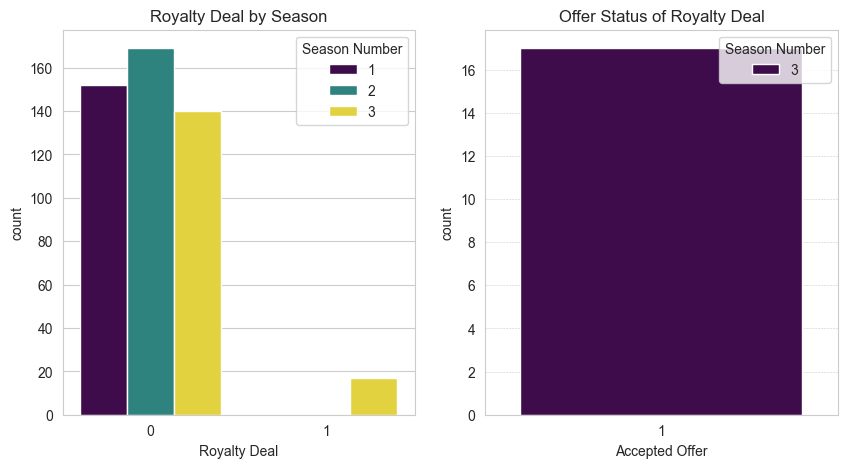

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.countplot(data=shark_data, x='Royalty Deal', palette='viridis', hue='Season Number', ax=axes[0])
sns.countplot(data=shark_data[shark_data['Royalty Deal']==1], hue='Season Number', x='Accepted Offer', ax=axes[1], palette='viridis', )
axes[0].set_title('Royalty Deal by Season')
axes[1].set_title("Offer Status of Royalty Deal")
plt.grid(visible=True, axis='y', lw=0.4, ls='--')
# plt.text(x=-1, y =-4, s="Only in season 3 royalty deals happened and all those deal successfully closed", fontsize=15, ha='center')
plt.show();

In [29]:
shark_data.dropna(subset=['Pitchers State'], inplace=True)
shark_data.dropna(subset=['Pitchers City'], inplace=True)   

In [30]:
import folium

In [31]:
import math

def location_count(no_of_pitchers, location):
    
    splitted_loc = location.split(',')
    count_per_location = math.floor(no_of_pitchers/len(splitted_loc))
    
   
    for loc in splitted_loc:
        if loc in count:
            count[loc] += count_per_location
        else:
            count[loc] = count_per_location
            
    if count_per_location < no_of_pitchers:
        count[loc] += 1 
        


In [32]:
loc_df = shark_data[['Number of Presenters', 'Pitchers State', 'Pitchers City']]

In [33]:
count = {}
loc_df.apply(lambda row: location_count(row['Number of Presenters'], row['Pitchers State']), axis=1);



In [34]:
count = {}
loc_df.apply(lambda row: location_count(row['Number of Presenters'], row['Pitchers City']), axis=1);

In [35]:
import geopy.geocoders

In [36]:
geolocator = geopy.geocoders.Nominatim(user_agent="my_app")

In [37]:
count

{'Delhi': 139,
 'Ahmedabad': 53,
 'Bangalore': 104,
 'Patiala': 4,
 'Baramati': 2,
 'Mohali': 2,
 'Jalna': 1,
 'Darbhanga': 2,
 'Nashik': 3,
 'Mumbai': 154,
 'Nagpur': 11,
 'Hyderabad': 38,
 'Gurgaon': 39,
 'Pune': 55,
 'Thiruvananthapuram': 1,
 'Vadodara': 8,
 'Kolkata': 35,
 'Chennai': 14,
 'Jaipur': 29,
 'Indore': 8,
 'Valsad': 3,
 'Panipat': 3,
 'Ludhiana': 10,
 'Ernakulam': 2,
 'Jammu': 2,
 'Mathura': 1,
 'Malegaon': 2,
 'Dehradun': 7,
 'Surat': 25,
 'Lucknow': 7,
 'Gandhinagar': 5,
 'Noida': 36,
 'Mangalore': 2,
 'Goa': 9,
 'Varanasi': 4,
 'Bhagalpur': 2,
 'Coimbatore': 5,
 'Thane': 7,
 'Modinagar': 1,
 'Madhubani': 2,
 'Darjeeling': 2,
 'Bhiwani': 1,
 'Barnagar': 2,
 'Faridabad': 6,
 'Shimla': 2,
 'Jamshedpur': 1,
 'Alwar': 1,
 'Ghaziabad': 4,
 'Amaravati': 5,
 'Shinde': 2,
 'Srinagar': 4,
 'Dhule': 2,
 'Kota': 2,
 'Udaipur': 3,
 'Ferozepur': 2,
 'Cochin': 1,
 'Raipur': 4,
 'Banaskantha': 2,
 'Pataudi': 1,
 'Ulhasnagar': 3,
 'Bhopal': 3,
 'Ballarpur': 1,
 'Karnal': 2,
 'Jalandha

In [46]:
loc_df = pd.DataFrame.from_dict(count, orient='index')
loc_df.reset_index(inplace=True)
loc_df.columns=['State', 'count']


In [47]:
loc_df

,State,count
0,Delhi,139
1,Ahmedabad,53
2,Bangalore,104
3,Patiala,4
4,Baramati,2
...,...,...
98,Bahadurgarh,2
99,Itanagar,1
100,Deoghar,2
101,Amritsar,3


C:\Users\adars\AppData\Local\Temp\ipykernel_23540\3333579099.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




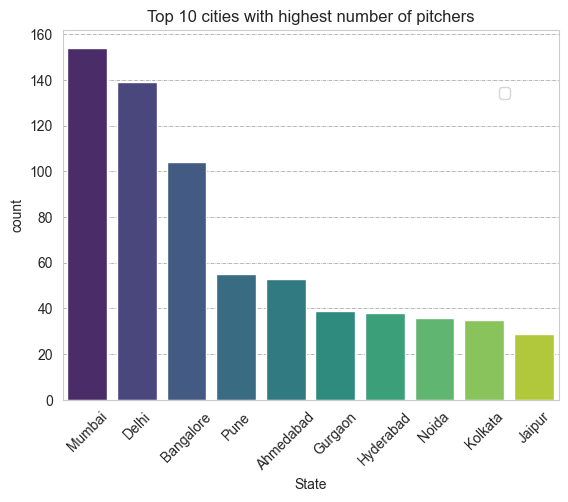

In [72]:
plot = sns.barplot(data = loc_df.sort_values(by='count', ascending=False).head(10), x="State", y="count", palette='viridis')
plt.title("Top 10 cities with highest number of pitchers")
plt.legend(loc=(0.88,.815))
plt.grid(visible=True, axis='y',color = "grey", linewidth = "0.4", linestyle = "-.")
plot.set_xticklabels(labels = loc_df.sort_values(by='count', ascending=False).head(10)['State'],rotation=45);

# The End